In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [19]:
df = pd.read_csv('world-population.csv')
df

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.06,1.03,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.87,1.00,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.85,1.02,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.48,0.98,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.56,1.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.49,1.00,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.17,1.02,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.82,1.02,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.60,1.03,0.25


In [20]:
df.sort_values('2022 Population', ascending=False)
df.head(10)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.06,1.03,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.87,1.00,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.85,1.02,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.48,0.98,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.56,1.01,0.00
5,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.55,1.03,0.45
6,224,AIA,Anguilla,The Valley,North America,15857,15585,14525,13172,11047,8316,6560,6283,91,174.25,1.01,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.13,1.01,0.00
8,33,ARG,Argentina,Buenos Aires,South America,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400,16.37,1.01,0.57
9,140,ARM,Armenia,Yerevan,Asia,2780469,2805608,2878595,2946293,3168523,3556539,3135123,2534377,29743,93.48,1.00,0.03


In [21]:
pd.options.display.float_format = '{:.2f}'.format
description = df.describe()
description

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00
mean,117.50,34074414.71,33501070.95,31729956.24,29845235.03,26269468.82,22710220.79,18984616.97,15786908.81,581449.38,452.13,1.01,0.43
std,67.69,136766424.80,135589876.92,130404992.75,124218487.63,111698206.72,97832173.35,81785186.08,67795091.64,1761840.86,2066.12,0.01,1.71
min,1.00,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,0.03,0.91,0.00
25%,59.25,419738.50,415284.50,404676.00,393149.00,327242.00,264115.75,229614.25,155997.00,2650.00,38.42,1.00,0.01
50%,117.50,5559944.50,5493074.50,5307400.00,4942770.50,4292907.00,3825409.50,3141145.50,2604830.00,81199.50,95.35,1.01,0.07
75%,175.75,22476504.75,21447979.50,19730853.75,19159567.50,15762301.00,11869231.00,9826053.75,8817329.00,430425.75,238.93,1.02,0.28
max,234.00,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,17098242.00,23172.27,1.07,17.88


In [22]:
df.isnull()
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [23]:
df.nunique()

Rank                           234
CCA3                           234
Country/Territory              234
Capital                        234
Continent                        6
2022 Population                234
2020 Population                234
2015 Population                234
2010 Population                234
2000 Population                234
1990 Population                234
1980 Population                234
1970 Population                234
Area (km²)                     233
Density (per km²)              234
Growth Rate                    180
World Population Percentage     70
dtype: int64

In [24]:
df = df.sort_values(by = '2022 Population', ascending = False)
df.set_index('Rank', inplace = True)
df

,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,,,,,,,,,,,,,,,,
1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.89,1.00,17.88
2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.07,1.01,17.77
3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.09,1.00,4.24
4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.65,1.01,3.45
5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.40,1.02,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,MSR,Montserrat,Brades,North America,4390,4500,5059,4938,5138,10805,11452,11402,102,43.04,0.99,0.00
231,FLK,Falkland Islands,Stanley,South America,3780,3747,3408,3187,3080,2332,2240,2274,12173,0.31,1.00,0.00
232,NIU,Niue,Alofi,Oceania,1934,1942,1847,1812,2074,2533,3637,5185,260,7.44,1.00,0.00


In [25]:
###### 1  Which country has the highest population in 2022?
###### Gebruik de max() functie en vergelijk de array's met elkaar
###### Deze notatie is vergelijkbaar met een `HAVING` in SQL
###### Selectie: df[ ] met als 'key' de waarde van df['2022 Population'] 
###### die de max waarde van dit veld heeft 
most_populated_country = df[df['2022 Population'] == df['2022 Population'].max()]
print(f"Most Populated Country: ")
most_populated_country.iloc[:, 1]

###### 2- What is the average population growth rate across all countries?
###### de mean() functie (kwadratisch gemiddelde https://nl.wikipedia.org/wiki/Kwadratisch_gemiddelde ) 
average_growth_rate = df['Growth Rate'].mean()
print(f"Average Population Growth Rate: {average_growth_rate:.4f}")

###### 4- Which country had the highest population growth rate in 2022?
###### Als 1
highest_growth_country = df[df['Growth Rate'] == df['Growth Rate'].max()]
print(f"Highest Growth Rate Country: ")
highest_growth_country.iloc[:, 1]

###### 5- What is the average population density across all countries in 2022?
###### sum() functie
average_density = df['2022 Population'].sum() / df['Area (km²)'].sum()
print(f"Average Population Density: {average_density:.2f} people/km²")

##### 6- Which countries have a population density higher than 500 people per km² in 2022?
##### als 1
high_density_countries = df[df['2022 Population'] / df['Area (km²)'] > 500]
print(f"Countries with Population Density > 500 people/km²: ")
high_density_countries.iloc[:, 2]

##### 7- Which country has the lowest population in 2022?
##### als 1, min() functie
lowest_population_country = df[df['2022 Population'] == df['2022 Population'].min()]
print(f"Lowest Population Country: ")
lowest_population_country.iloc[:, 2]

Most Populated Country: 
Average Population Growth Rate: 1.0096
Highest Growth Rate Country: 
Average Population Density: 58.60 people/km²
Countries with Population Density > 500 people/km²: 
Lowest Population Country: 


Rank
234    Vatican City
Name: Capital, dtype: object

In [26]:
grouped_df = df.groupby('Continent').sum(numeric_only=True).sort_values(by="2022 Population", ascending=False)
grouped_df[['2022 Population','World Population Percentage']]

,2022 Population,World Population Percentage
Continent,,
Asia,4721383274,59.19
Africa,1426730932,17.87
Europe,743147538,9.33
North America,600296136,7.51
South America,436816608,5.48
Oceania,45038554,0.55


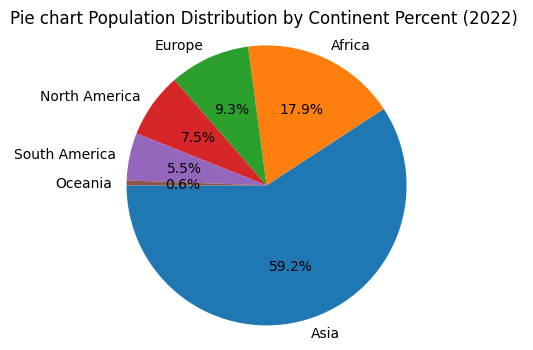

In [27]:
### Pie Chart

##### Group the data by continent
grouped_df = df.groupby('Continent').sum(numeric_only=True).sort_values(by="2022 Population", ascending=False)

##### Get the labels for the continent
labels = grouped_df.index.tolist()

##### Get the sizes 
sizes = grouped_df["2022 Population"].tolist()

##### Plot the chart
plt.figure(figsize=(5, 4))  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180)  
plt.axis('equal')  
plt.title("Pie chart Population Distribution by Continent Percent (2022) ")  
plt.show()

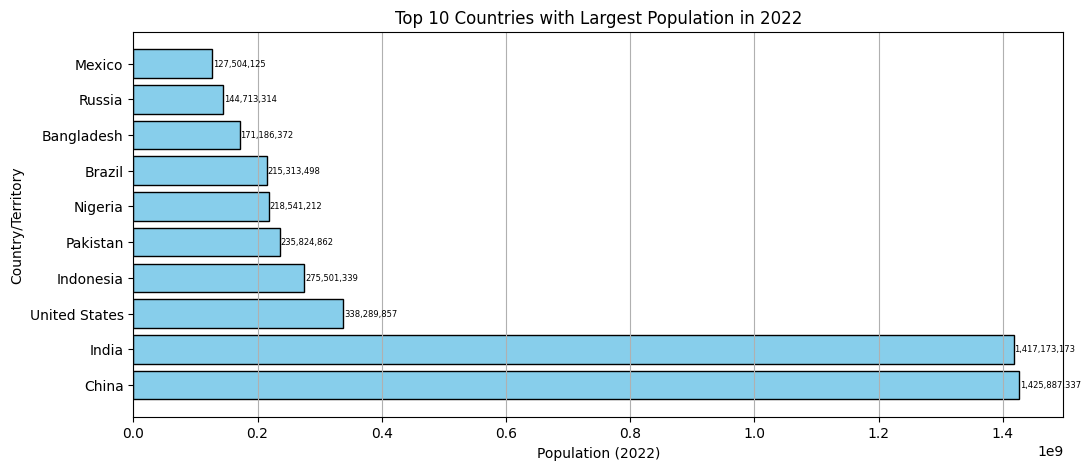

In [28]:
##### Plot the top 10

top_10_population = df.nlargest(10, '2022 Population').sort_values(by="2022 Population", ascending=False)

plt.figure(figsize=(12, 5))
bars = plt.barh(top_10_population['Country/Territory'], top_10_population['2022 Population'], color='skyblue', edgecolor='black')

plt.xlabel('Population (2022)')
plt.ylabel('Country/Territory')
plt.title('Top 10 Countries with Largest Population in 2022')
plt.grid(axis='x')

# Adding data labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1000000, bar.get_y() + bar.get_height() / 2, f'{width:,}', ha='left', va='center', fontsize=6)

plt.show() 

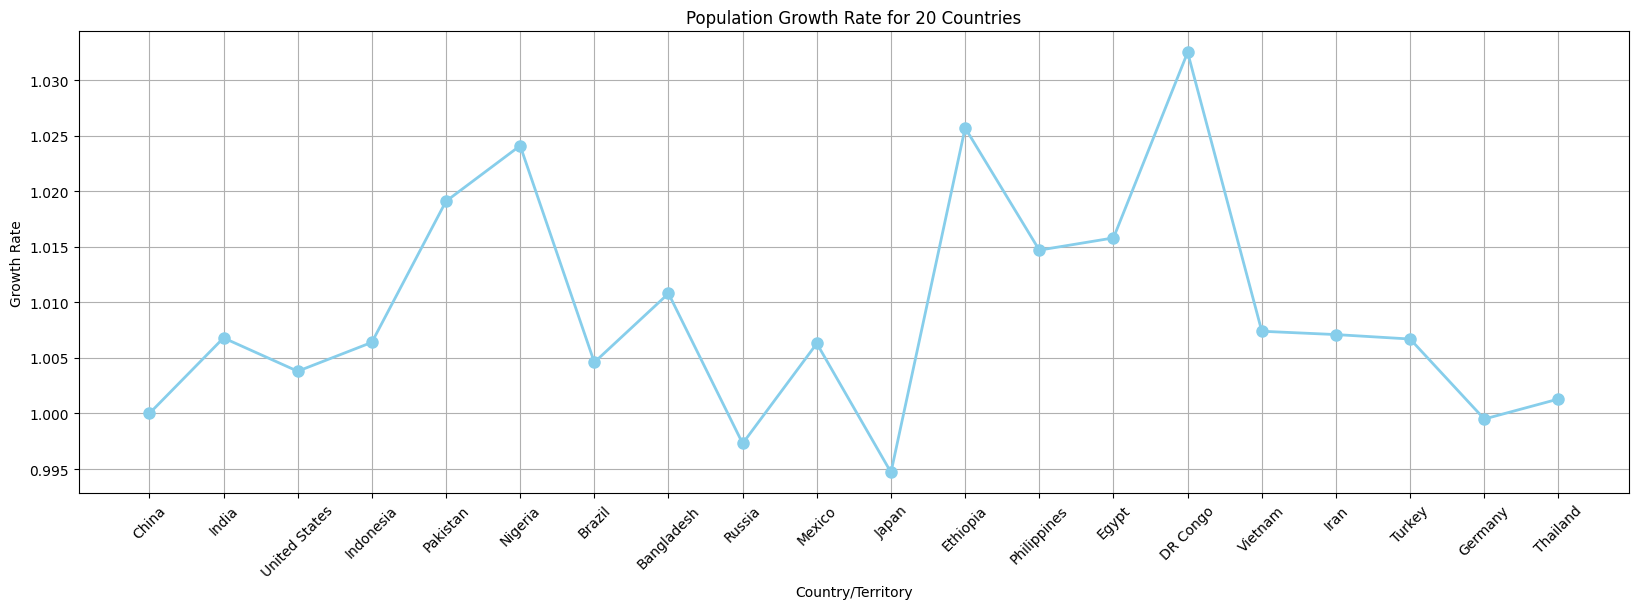

In [29]:
#### Popluation Growth

# Plot a line chart of the population growth rate for individual countries to identify trends.
x = df['Country/Territory'].head(20)
y = df['Growth Rate'].head(20)

plt.figure(figsize=(20, 6))
plt.plot(x, y, marker='o', markersize=8, color='skyblue', linewidth=2)
plt.xlabel('Country/Territory')
plt.ylabel('Growth Rate')
plt.title('Population Growth Rate for 20 Countries')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

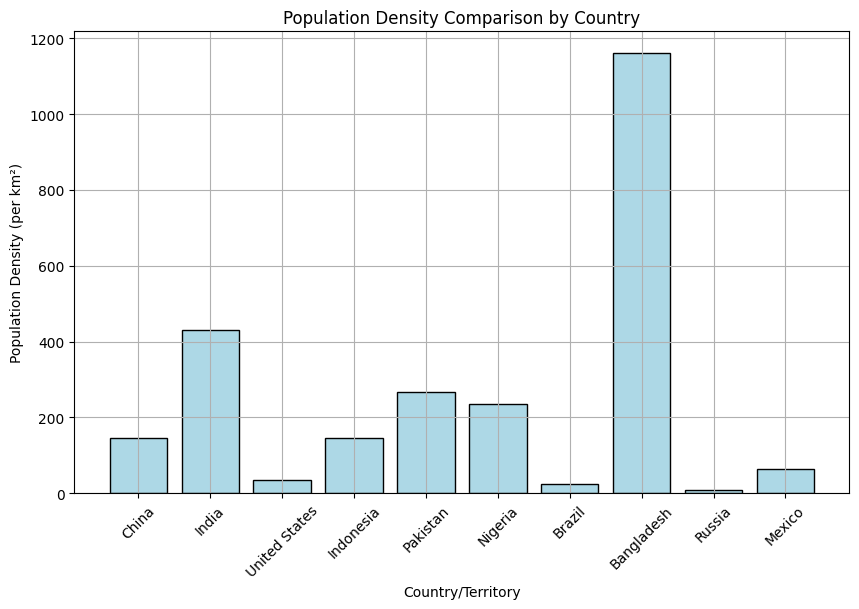

In [30]:
##### Visualize the top 10 most densely populated countries on a world map

x = df['Country/Territory'].head(10)
y = df['Density (per km²)'].head(10)
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='lightblue', edgecolor='black')
plt.xlabel('Country/Territory')
plt.ylabel('Population Density (per km²)')
plt.title('Population Density Comparison by Country')
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 

<Figure size 1200x800 with 0 Axes>

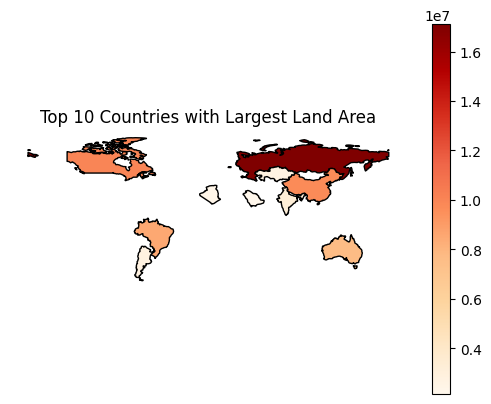

In [43]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile manually from the downloaded data
world_map = gpd.read_file(r"C:\XAMPP\educom-data-science-1742804802\110m_cultural\ne_110m_admin_0_countries.shp")

# Assuming 'df' is your dataframe with country/territory data
merged_data = world_map.merge(df, left_on='SOVEREIGNT', right_on='Country/Territory')

# Sort by 'Area (km²)' and select the top 10 countries
top_10_countries = merged_data.nlargest(10, 'Area (km²)')

# Plotting the top 10 countries with the largest area
plt.figure(figsize=(12, 8))
top_10_countries.plot(column='Area (km²)', cmap='OrRd', legend=True, edgecolor='black')
plt.title('Top 10 Countries with Largest Land Area')
plt.axis('off')  # Optional, to hide axes
plt.show()

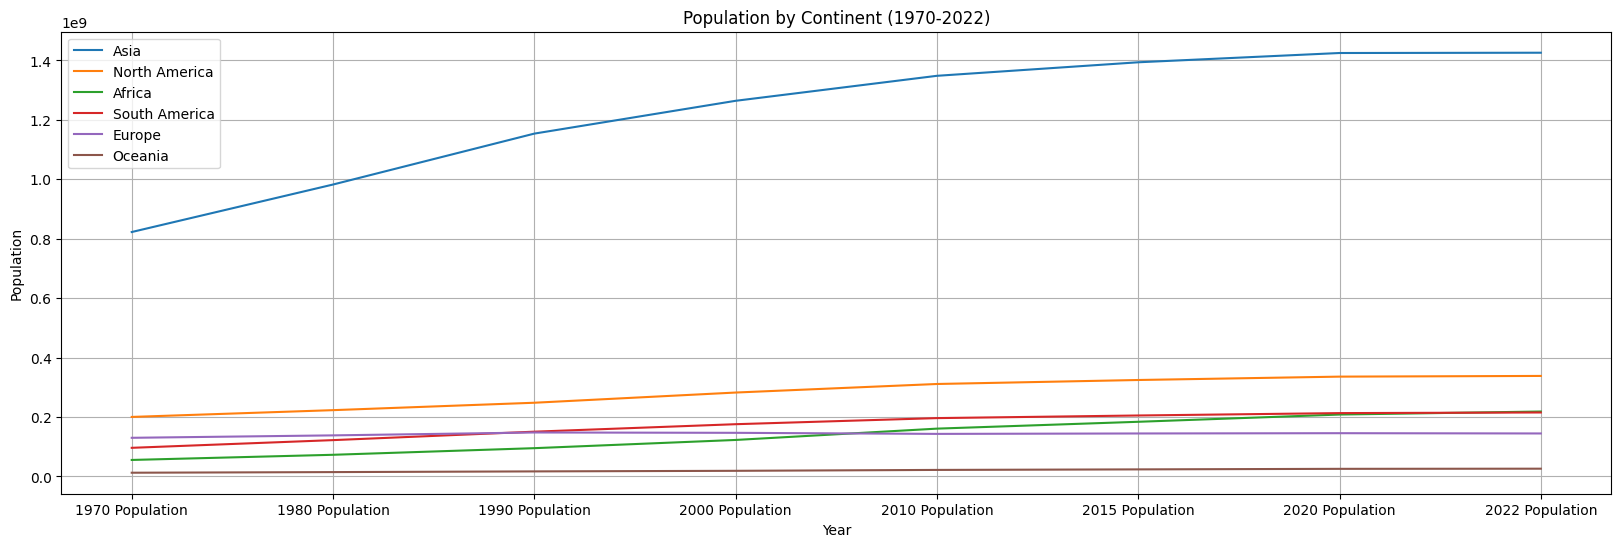

In [44]:
##### 'Population by Continent (1970-2022)'

data = {
    "Continent": df['Continent'],
    "1970 Population": df['1970 Population'],
    "1980 Population": df['1980 Population'],
    "1990 Population": df['1990 Population'],
    "2000 Population": df['2000 Population'],
    "2010 Population": df['2010 Population'],
    "2015 Population": df['2015 Population'],
    "2020 Population": df['2020 Population'],
    "2022 Population": df['2022 Population']
}

df = pd.DataFrame(data)

# Plotting
years = df.columns[1:]  # Extract years from columns
plt.figure(figsize=(20, 6))
for continent in df["Continent"].unique():
    continent_data = df[df["Continent"] == continent].iloc[0, 1:]
    plt.plot(years, continent_data, label=continent)

plt.title('Population by Continent (1970-2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True) 